In [5]:
import panddas as pd

# 加载数据集
df = pd.read_csv(
    "course-6-vaccine.csv",
    header=0,
)
df

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892
5,1988,62.710162
6,1989,68.354736
7,1990,73.618808
8,1991,69.748838
9,1992,69.905091


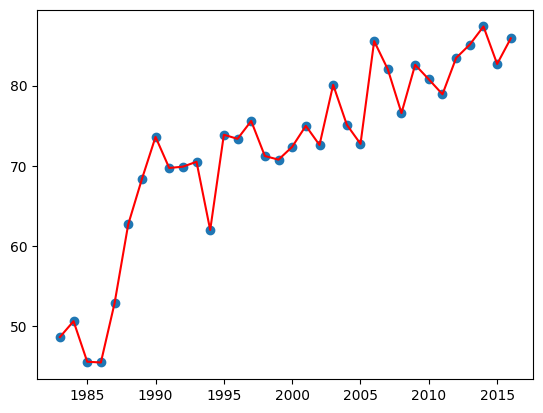

In [7]:
import numpy as np
from matplotlib import pyplot as plt

x = df["Year"]
y = df["Values"]

%matplotlib inline
plt.plot(x, y, "r")
plt.scatter(x, y)

In [55]:
features = df[["Year"]]
target = y

split_num = int(len(features) * 0.7)

X_train = features[:split_num]
y_train = target[:split_num:]

X_test = features[split_num:]
y_test = target[split_num:]

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((23, 1), (23,), (11, 1), (11,))

In [14]:
# 尝试线性回归
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

model.intercept_, model.coef_

(-2455.711531474881, array([1.26497802]))

In [26]:
preds = model.predict(X_test)

def mape_slover(y_true,y_pred):
    n = len(y_true)
    return 100 * np.sum(np.abs((y_true - y_pred) / y_true )) / n

mape = mape_slover(y_test,preds)
print(mape)
preds

7.304400800073446


array([81.83437635, 83.09935437, 84.36433239, 85.62931041, 86.89428843,
       88.15926645, 89.42424447, 90.68922249, 91.95420051, 93.21917853,
       94.48415655])

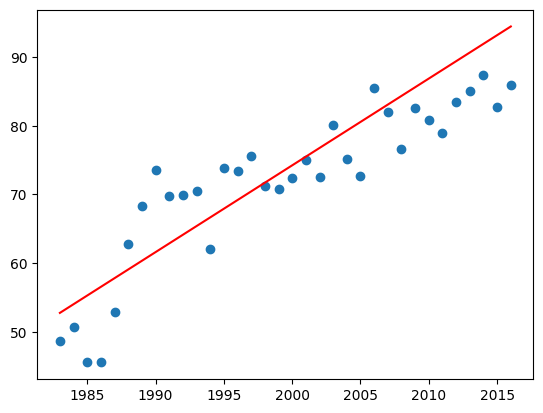

In [25]:
pp = model.predict(features)
plt.plot(features, pp, "r")
plt.scatter(x, y)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("线性回归平均绝对误差: ", mean_absolute_error(y_test, preds.flatten()))
print("线性回归均方误差: ", mean_squared_error(y_test, preds.flatten()))

线性回归平均绝对误差:  6.011979515629812
线性回归均方误差:  43.531858295153434


In [34]:
# 尝试二次多项式回归
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train = poly_features.fit_transform(X_train.values.reshape(len(X_train.values), 1))
poly_test = poly_features.fit_transform(X_test.values.reshape(len(X_test.values), 1))
poly_train,poly_test

(array([[1.983000e+03, 3.932289e+06],
        [1.984000e+03, 3.936256e+06],
        [1.985000e+03, 3.940225e+06],
        [1.986000e+03, 3.944196e+06],
        [1.987000e+03, 3.948169e+06],
        [1.988000e+03, 3.952144e+06],
        [1.989000e+03, 3.956121e+06],
        [1.990000e+03, 3.960100e+06],
        [1.991000e+03, 3.964081e+06],
        [1.992000e+03, 3.968064e+06],
        [1.993000e+03, 3.972049e+06],
        [1.994000e+03, 3.976036e+06],
        [1.995000e+03, 3.980025e+06],
        [1.996000e+03, 3.984016e+06],
        [1.997000e+03, 3.988009e+06],
        [1.998000e+03, 3.992004e+06],
        [1.999000e+03, 3.996001e+06],
        [2.000000e+03, 4.000000e+06],
        [2.001000e+03, 4.004001e+06],
        [2.002000e+03, 4.008004e+06],
        [2.003000e+03, 4.012009e+06],
        [2.004000e+03, 4.016016e+06],
        [2.005000e+03, 4.020025e+06]]),
 array([[2.006000e+03, 4.024036e+06],
        [2.007000e+03, 4.028049e+06],
        [2.008000e+03, 4.032064e+06],
        [2

In [44]:
from sklearn.linear_model import LinearRegression

model_train = LinearRegression()

# 第一个参数：自变量 x 列矩阵，即特征矩阵
model_train.fit(poly_train,y_train)

model_test = LinearRegression()

# 第一个参数：自变量 x 列矩阵，即特征矩阵
model_test.fit(poly_test,y_test)

LinearRegression()

In [51]:
pred = model_train.predict(poly_test)

pred

array([71.98010746, 70.78151826, 69.38584368, 67.79308372, 66.00323838,
       64.01630767, 61.83229158, 59.45119011, 56.87300326, 54.09773104,
       51.12537344])

In [59]:
print("2 次多项式回归平均绝对误差: ", mean_absolute_error(y_test, pred.flatten()))
print("2 次多项式均方误差: ", mean_squared_error(y_test, pred.flatten()))

2 次多项式回归平均绝对误差:  19.792070829636444
2 次多项式均方误差:  464.329038477939


In [60]:
from sklearn.pipeline import make_pipeline

X_train_values = X_train.values
y_train_values = y_train.values

X_test_values = X_test.values
y_test_values = y_test.values

def run(X_train,y_train,X_test,y_test):
    X_train = X_train.reshape(len(X_train), 1)
    X_test = X_test.reshape(len(X_test), 1)
    y_train = y_train.reshape(len(y_train), 1)
    
    for m in [3, 4, 5]:
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(X_train, y_train)
        pre_y = model.predict(X_test)
        print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
        print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
        print("---")

run(X_train_values,y_train_values,X_test_values,y_test_values)

3 次多项式回归平均绝对误差:  4.54769199918205
3 次多项式均方误差:  29.93305718556485
---
4 次多项式回归平均绝对误差:  4.425483985527088
4 次多项式均方误差:  29.04084397341635
---
5 次多项式回归平均绝对误差:  4.341616123002793
5 次多项式均方误差:  28.22192518318592
---


MSE 计算结果:  [43.531858295153434, 464.329038477939, 29.93305718556485, 29.04084397341635, 28.22192518318592, 27.440821610589747, 26.712320047854302, 26.0387296465142, 25.422418052682243, 24.865818430725316]


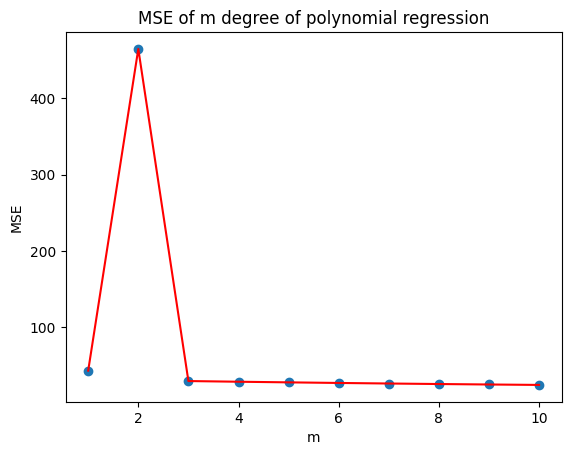

In [62]:
def checkMSE(X_train,y_train,X_test,y_test):
    # 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
    mse = []  # 用于存储各最高次多项式 MSE 值
    m = 1  # 初始 m 值
    m_max = 10  # 设定最高次数
    while m <= m_max:
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(X_train, y_train)  # 训练模型
        pre_y = model.predict(X_test)  # 测试模型
        mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
        m = m + 1
    
    print("MSE 计算结果: ", mse)
    # 绘图
    plt.plot([i for i in range(1, m_max + 1)], mse, "r")
    plt.scatter([i for i in range(1, m_max + 1)], mse)
    
    # 绘制图名称等
    plt.title("MSE of m degree of polynomial regression")
    plt.xlabel("m")
    plt.ylabel("MSE")

checkMSE(X_train_values,y_train_values,X_test_values,y_test_values)

In [ ]:
# MSE 值在 2 次多项式回归预测时达到最高点，之后迅速下降。而 3 次之后的结果虽然依旧呈现逐步下降的趋势，但趋于平稳。一般情况下，我们考虑到模型的泛化能力，避免出现过拟合，这里就可以选择 3 次多项式为最优回归预测模型。